Computer vision fundamentals including simple neural networks

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from google.colab.patches import cv2_imshow



In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
## Print the shape and type of training data samples
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Shape of one sample (X_train[0]):", X_train[0].shape)



Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (60000, 28, 28)
Shape of one sample (X_train[0]): (28, 28)


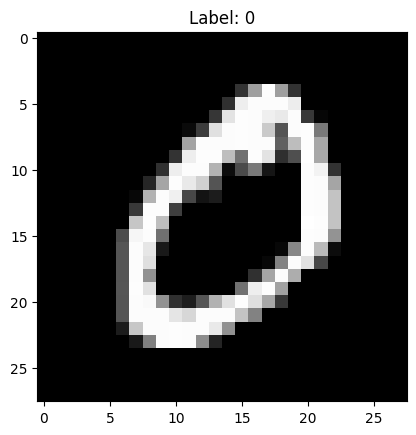

In [4]:
## Visualize an example image from the training set
plt.imshow(X_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.show()

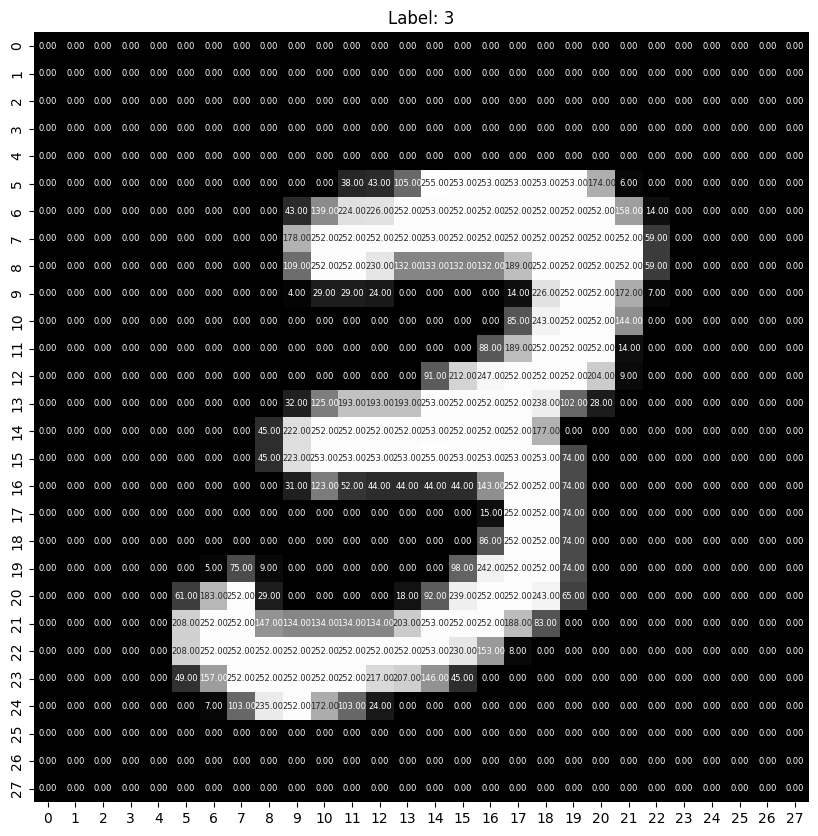

In [8]:


# Assuming X_train[7] is a 28x28 NumPy array
plt.figure(figsize=(10, 10))  # Adjusted figure size
sns.heatmap(X_train[7], cmap='gray', annot=True, fmt=".2f", annot_kws={"size": 6}, cbar=False)
plt.title(f"Label: {y_train[7]}")
plt.show()


In [9]:
# Check dataset dimensions
print("Training data size:", len(X_train))
print("Test data size:", len(X_test))

Training data size: 60000
Test data size: 10000


In [10]:
# Model creation and summary
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="InputLayer"),
    tf.keras.layers.Dense(500, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model = tf.keras.models.Sequential(LAYERS)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Checking the weights of the first layer
weights, bias = model.layers[1].get_weights()
print("Weights shape:", weights.shape)
print("Bias shape:", bias.shape)

Weights shape: (784, 500)
Bias shape: (500,)


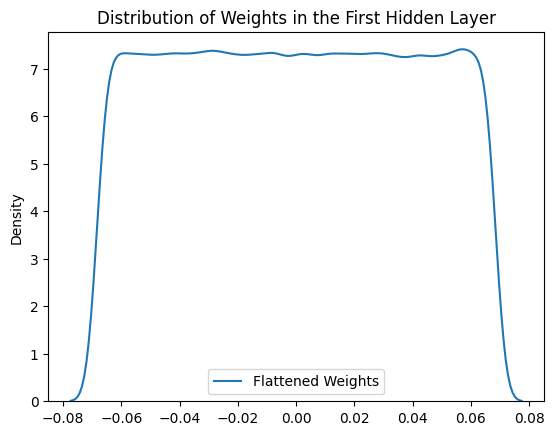

In [13]:
# Visualizing the distribution of the weights
sns.kdeplot(weights.flatten(), label="Flattened Weights")
plt.title("Distribution of Weights in the First Hidden Layer")
plt.legend()
plt.show()

In [14]:
# Model compilation
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

In [15]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [16]:
# Split training and validation data (from the test set)
x_valid, y_valid = X_test[:10000], y_test[:10000]

In [17]:
# Training the model
EPOCHS = 10
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(x_valid, y_valid))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7785 - loss: 3.6136 - val_accuracy: 0.9116 - val_loss: 0.3140
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9250 - loss: 0.3040 - val_accuracy: 0.9454 - val_loss: 0.2047
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9507 - loss: 0.1821 - val_accuracy: 0.9531 - val_loss: 0.1811
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9630 - loss: 0.1383 - val_accuracy: 0.9545 - val_loss: 0.1683
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9678 - loss: 0.1223 - val_accuracy: 0.9655 - val_loss: 0.1433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9725 - loss: 0.1072 - val_accuracy: 0.9704 - val_loss: 0.1368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9762 - loss: 0.0950 - val_accuracy: 0.9689 - val_loss: 0.1390
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9796 - loss: 

In [18]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1930
Test accuracy: 0.9677, Test loss: 0.1627


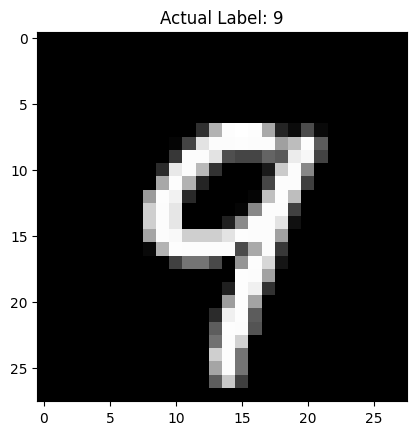

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Label: 9


In [19]:
# Visualizing some predictions
plt.imshow(X_test[12], cmap='gray')
plt.title(f"Actual Label: {y_test[12]}")
plt.show()

prediction = model.predict(X_test[12].reshape(1, 28, 28))
predicted_class = np.argmax(prediction)
print(f"Predicted Label: {predicted_class}")

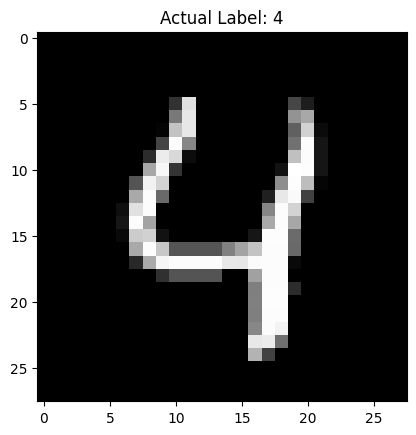

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: 4


In [20]:
# Display another image with prediction
plt.imshow(X_test[4], cmap='gray')
plt.title(f"Actual Label: {y_test[4]}")
plt.show()

predicted_class_2 = np.argmax(model.predict(X_test[4].reshape(1, 28, 28)))
print(f"Predicted Label: {predicted_class_2}")

In [21]:
# Saving the trained model
model.save("mnist_model.keras")
print("Model saved as 'mnist_model.keras'")

Model saved as 'mnist_model.keras'


In [22]:
# Loading the saved model
loaded_model = tf.keras.models.load_model("mnist_model.keras")
print("Model loaded successfully.")

Model loaded successfully.


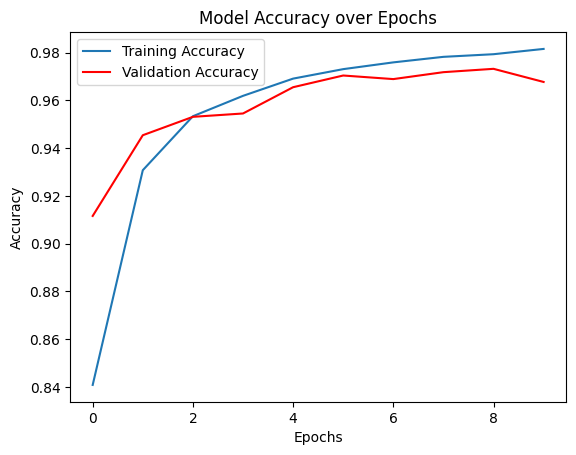

In [23]:
# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
# Creating a DataFrame to summarize the training history
history_df = pd.DataFrame(history.history)
print(history_df)


   accuracy      loss  val_accuracy  val_loss
0  0.840850  1.111676        0.9116  0.314035
1  0.930750  0.275902        0.9454  0.204687
2  0.953350  0.174692        0.9531  0.181125
3  0.961883  0.145913        0.9545  0.168328
4  0.969100  0.118555        0.9655  0.143309
5  0.973067  0.106766        0.9704  0.136756
6  0.975900  0.096266        0.9689  0.138954
7  0.978217  0.085823        0.9718  0.147795
8  0.979317  0.084886        0.9732  0.135745
9  0.981533  0.081568        0.9677  0.162703


In [25]:
# Performance on a few test samples
X_new = X_test[:3]
y_new = y_test[:3]

In [26]:
# Predicting on new data
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


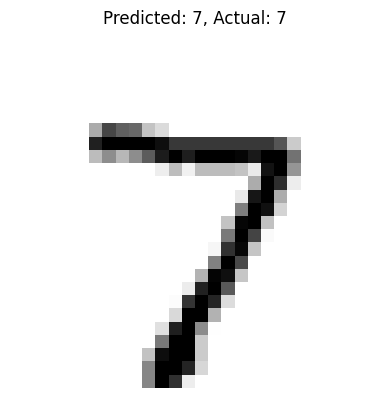

------------------------------------------------------------


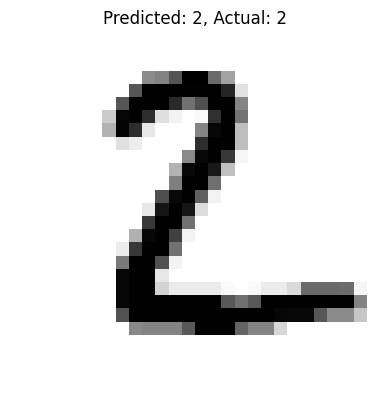

------------------------------------------------------------


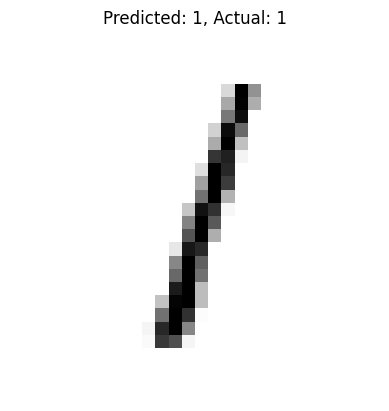

------------------------------------------------------------


In [27]:
# Visualizing predictions
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---" * 20)

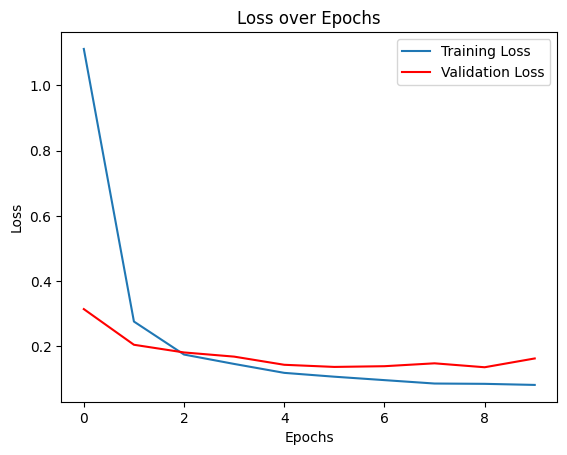

In [28]:
# Plotting the loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, color='red', label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Classification methods such as SVM and K-nearest neighbors

In [38]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
# Reshape the data to 2D (samples, features)
# Flatten the images to 1D vectors for KNN, SVM, and Logistic Regression
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [40]:
# Normalize the data by scaling the pixel values to the range [0, 1]
X_train_flattened = X_train_flattened / 255.0
X_test_flattened = X_test_flattened / 255.0

In [41]:
# Split the training data for validation (optional)
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train_flattened, y_train, test_size=0.1, random_state=42
)

In [42]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='rbf', gamma='scale')
log_reg = LogisticRegression(max_iter=1000)

In [43]:
# K-Nearest Neighbors
knn.fit(X_train_split, y_train_split)



KNeighborsClassifier(n_neighbors=3)

In [44]:
# Support Vector Machine
svm.fit(X_train_split, y_train_split)

SVC()

In [45]:
# Logistic Regression
log_reg.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [46]:
nn_model = tf.keras.models.load_model("mnist_model.keras")  # using the existing model

In [47]:
# Get predictions for each model
y_pred_knn = knn.predict(X_test_flattened)
y_pred_svm = svm.predict(X_test_flattened)
y_pred_log_reg = log_reg.predict(X_test_flattened)
y_pred_nn = np.argmax(nn_model.predict(X_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [48]:
# Calculate accuracy for each model
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_nn = accuracy_score(y_test, y_pred_nn)

In [49]:
# Print accuracy for each model
print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Logistic Regression Accuracy: {acc_log_reg:.4f}")
print(f"Neural Network Accuracy: {acc_nn:.4f}")

KNN Accuracy: 0.9704
SVM Accuracy: 0.9782
Logistic Regression Accuracy: 0.9249
Neural Network Accuracy: 0.9677


In [50]:
# Visualizing the comparison of models using a bar chart
models = ['KNN', 'SVM', 'Logistic Regression', 'Neural Network']
accuracies = [acc_knn, acc_svm, acc_log_reg, acc_nn]

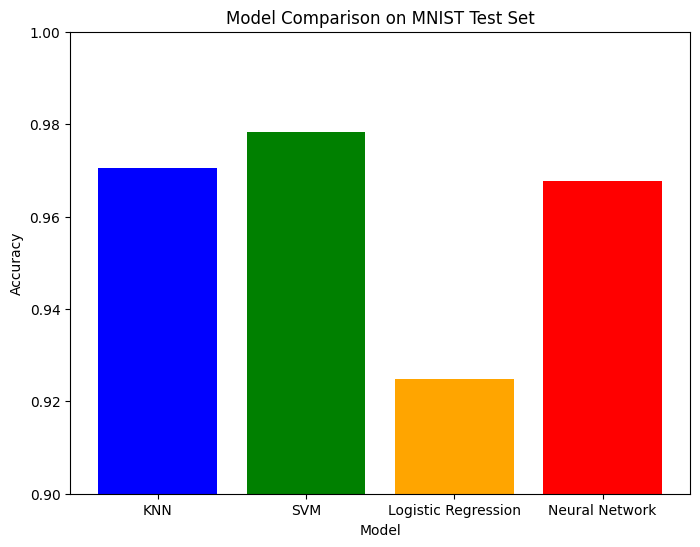

In [51]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on MNIST Test Set')
plt.ylim([0.90, 1.0])  # Adjust y-axis to show values more clearly
plt.show()

Output:


The output of the accuracy values of KNN, SVM, Logistic Regression, and Neural Network models are:




SVM will have the highest accuracy (0.9782).

KNN will follow closely (0.9704).

Neural Network comes next (0.9677).

Logistic Regression will have the lowest accuracy (0.9249).